In [13]:
import pymc3 as pm
import pandas as pd
import matplotlib.pyplot as plt
import fmax as fm
import numpy as np
import arviz as az

In [14]:
def plot_posterior_predictive(fcast_model, label):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.posterior_predictive_samples
    index = fcast_model.train_index

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.01, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.1, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.9, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.99, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=(13,8))

    axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="99% CI", color="C0")
    axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="80% CI", color="C0")
    axs.plot(index, medians, label="Median")
    axs.plot(index, fcast_model.train_data, color="red", label="Training")
    axs.legend()
    axs.set_xlabel("Period")
    axs.set_ylabel("Record")
    axs.set_title(label)

    fig.tight_layout()

    return fig

In [15]:
def plot_forecast(fcast_model, test_data, label, actual):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.forecast_samples
    index = fcast_model.master_with_fcast_index

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.01, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.1, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.9, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.99, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=(13,8))
    
    axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="99% CI", color="C0")
    axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="80% CI", color="C0")
    axs.plot(index, medians, label="Median")
    axs.plot(fcast_model.train_index, fcast_model.train_data, color="red", label="Training")
    axs.plot(fcast_model.fcast_index, test_data, color="black", label="Tryfos")
    axs.plot(fcast_model.fcast_index, actual, color="green", label="Actual")
    axs.legend()
    axs.set_xlabel("Period")
    axs.set_ylabel("Record")
    axs.set_title(label)

    fig.tight_layout()

    return fig

In [16]:
def plot_forecast_fin(fcast_model, test_data, label, actual):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.forecast_samples
    index = fcast_model.master_with_fcast_index

    # Convert to the actual years
    index = [1968+i for i in range(len(index))]

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.025, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.16, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.84, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.975, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=(13,8))
    
    axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="95% CI", color="C0")
    axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="68% CI", color="C0")
    axs.plot(index, medians, label="Median", color="blue")
    axs.plot([1968+i for i in range(len(fcast_model.train_index))], fcast_model.train_data, color="green", label="Training")
    axs.plot([1983+i for i in range(len(fcast_model.fcast_index))], test_data, color="black", label="Tryfos")
    axs.plot([1983+i for i in range(len(fcast_model.fcast_index))], actual, color="red", label="Actual")
    axs.legend()
    axs.set_xlabel("Period")
    axs.set_ylabel("Record")
    axs.set_title(label)

    fig.tight_layout()

    return fig

In [17]:
def plot_forecast_small(fcast_model, test_data, label, actual):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.forecast_samples
    index = fcast_model.master_with_fcast_index

    # Convert to the actual years
    index = [1968+i for i in range(len(index))]

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.025, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.16, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.84, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.975, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=(8,5))
    
    axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="95% CI", color="C0")
    axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="68% CI", color="C0")
    axs.plot(index, medians, label="Median", color="blue")
    axs.plot([1968+i for i in range(len(fcast_model.train_index))], fcast_model.train_data, color="green", label="Training")
    axs.plot([1983+i for i in range(len(fcast_model.fcast_index))], test_data, color="black", label="Tryfos")
    axs.plot([1983+i for i in range(len(fcast_model.fcast_index))], actual, color="red", label="Actual")
    axs.legend()
    #axs.set_xlabel("Period")
    #axs.set_ylabel("Record")
    #axs.set_title(label)

    fig.tight_layout()

    return fig

In [18]:
whiches = ["1000m", "1m", "5000m", "Marathon", "10000m"]
which = whiches[0]

In [19]:
df = pd.read_csv("tryfos_data.csv")
years, records = df["Year"].values, df[which].values # Years 1983 and onward are just forecasts

training_years = years[:15]
training_records = records[:15]
tryfos_years = years[15:]
tryfos_fcast = records[15:]

actual_df = pd.read_csv("tryfos_actual.csv")
_, actual_records = actual_df["Year"].values, actual_df[which].values

In [20]:
prior_parameters = {
        'alpha' : {
            'lower' : 1e-5,
            'upper' : 10e4,
        },
        'beta' : {
            'lower' : 1e-5,
            'upper': 10e4,
        }
    }

In [21]:
model = fm.WeibullForecastModel(training_records, prior_parameters=prior_parameters, attempt_distribution="weibull", 
                            kind="min", train='all', fcast_len=len(tryfos_fcast), fcast_test_data=actual_records)
model.fit(chains=1, draws=10000, tune=3000)
model.posterior_predictive()
model.forecast()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [beta, alpha]


Sampling 1 chain for 3_000 tune and 10_000 draw iterations (3_000 + 10_000 draws total) took 31 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


array([<AxesSubplot:title={'center':'alpha'}>,
       <AxesSubplot:title={'center':'beta'}>,
       <AxesSubplot:title={'center':'log_like_holdout'}>], dtype=object)

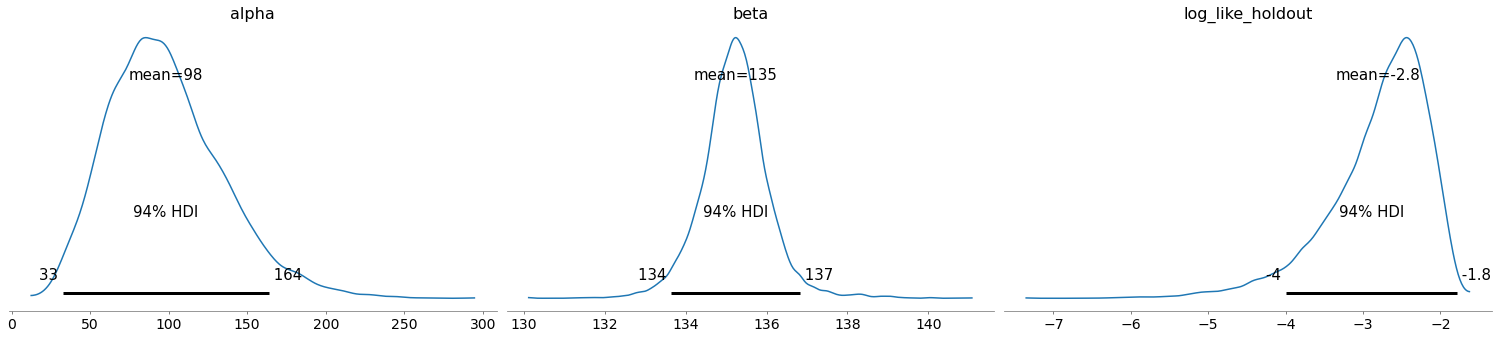

In [22]:
az.plot_posterior(model.trace)

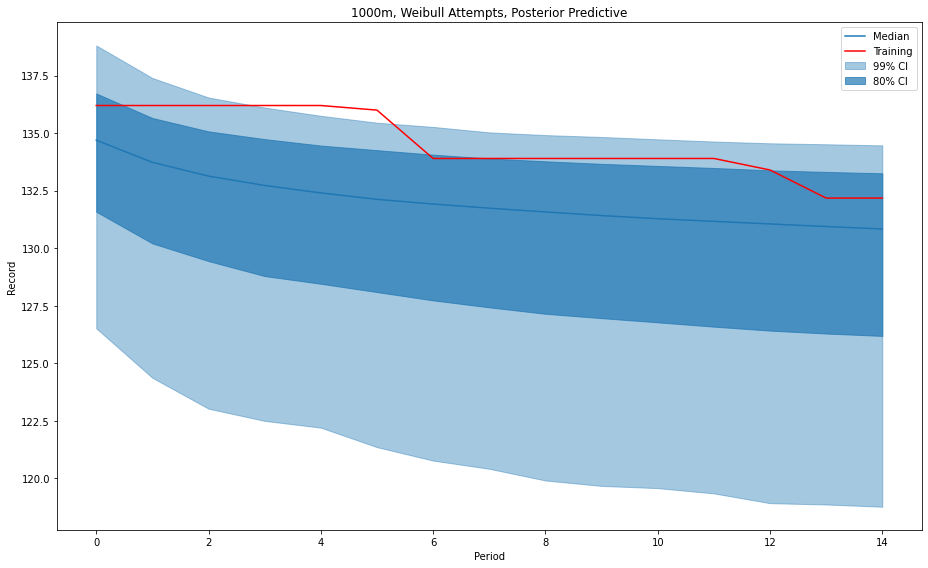

In [23]:
fig = plot_posterior_predictive(model, f"{which}, Weibull Attempts, Posterior Predictive")

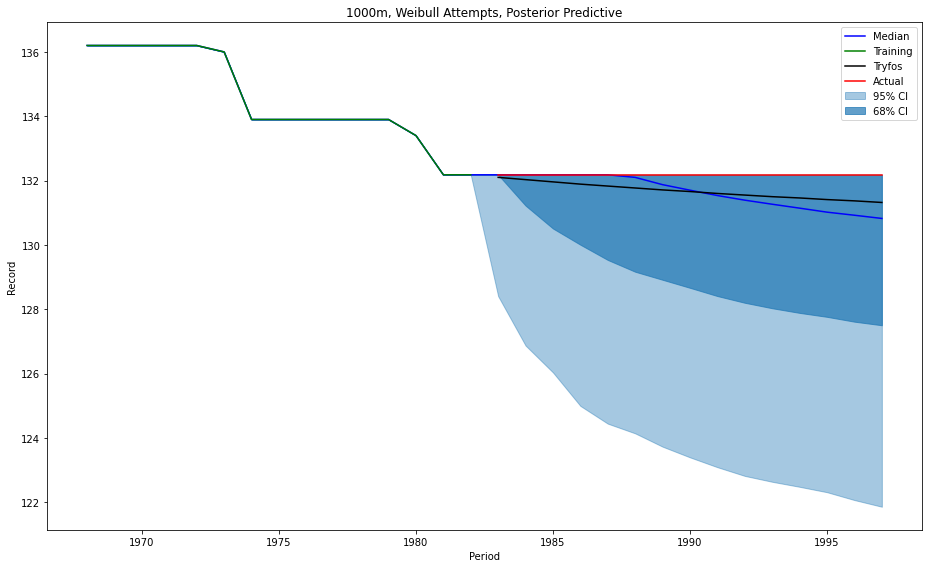

In [24]:
fig = plot_forecast_fin(model, tryfos_fcast, f"{which}, Weibull Attempts, Posterior Predictive",  actual_records)

# Run them all

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [beta, alpha]


Sampling 1 chain for 3_000 tune and 10_000 draw iterations (3_000 + 10_000 draws total) took 25 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [beta, alpha]


Sampling 1 chain for 3_000 tune and 10_000 draw iterations (3_000 + 10_000 draws total) took 29 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [beta, alpha]


Sampling 1 chain for 3_000 tune and 10_000 draw iterations (3_000 + 10_000 draws total) took 29 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [beta, alpha]


Sampling 1 chain for 3_000 tune and 10_000 draw iterations (3_000 + 10_000 draws total) took 39 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [beta, alpha]


Sampling 1 chain for 3_000 tune and 10_000 draw iterations (3_000 + 10_000 draws total) took 23 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


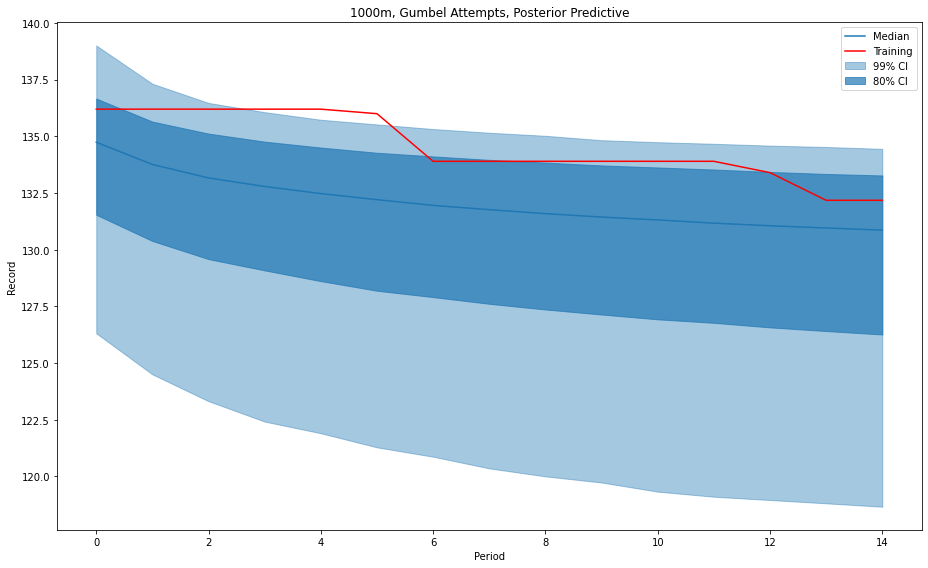

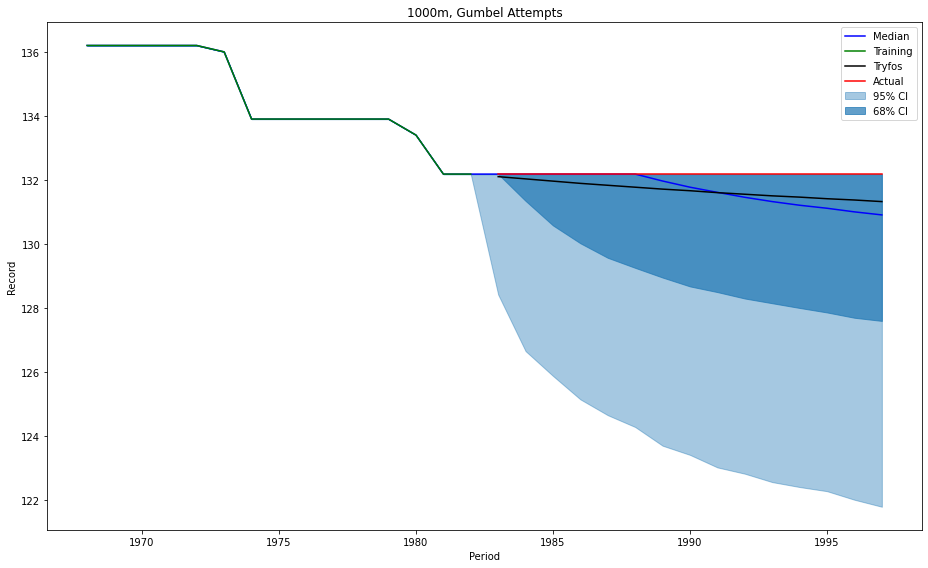

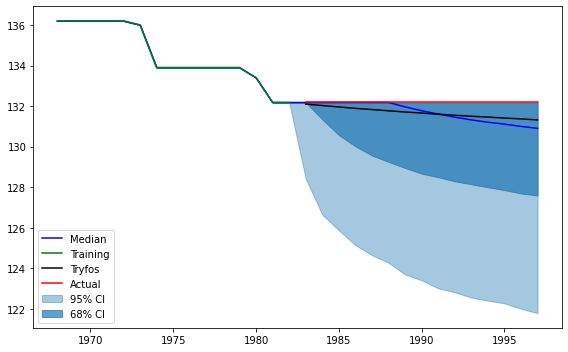

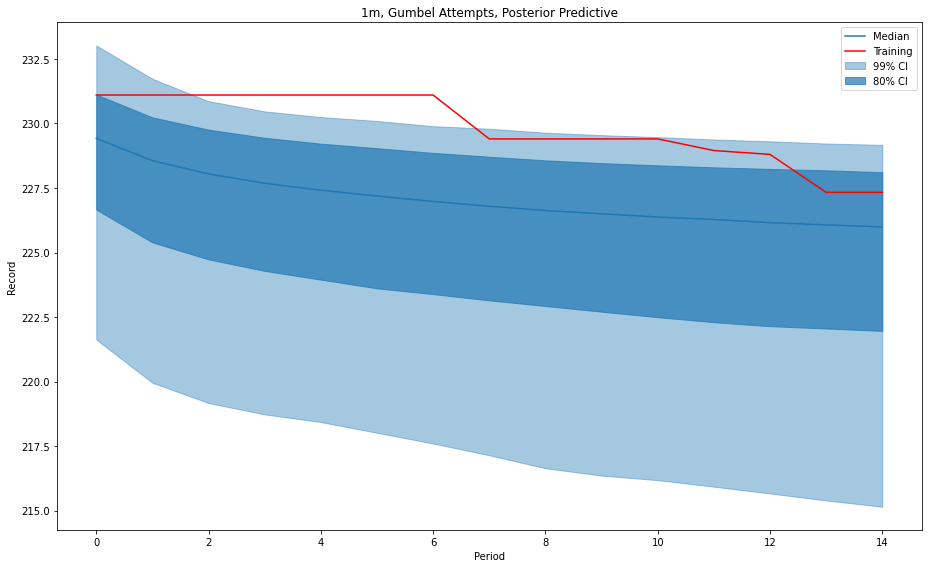

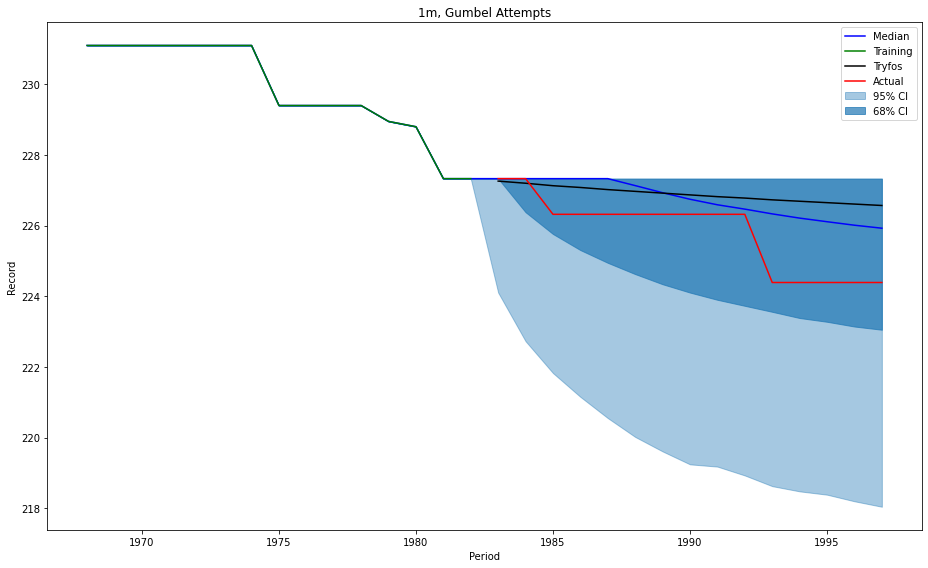

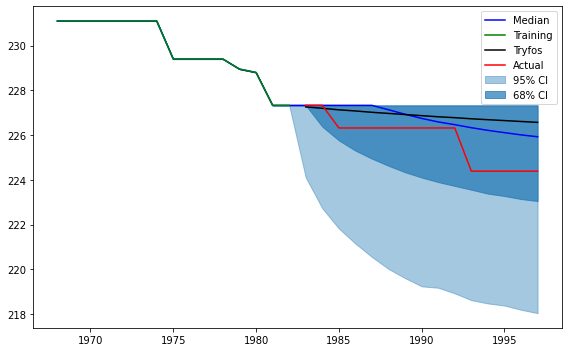

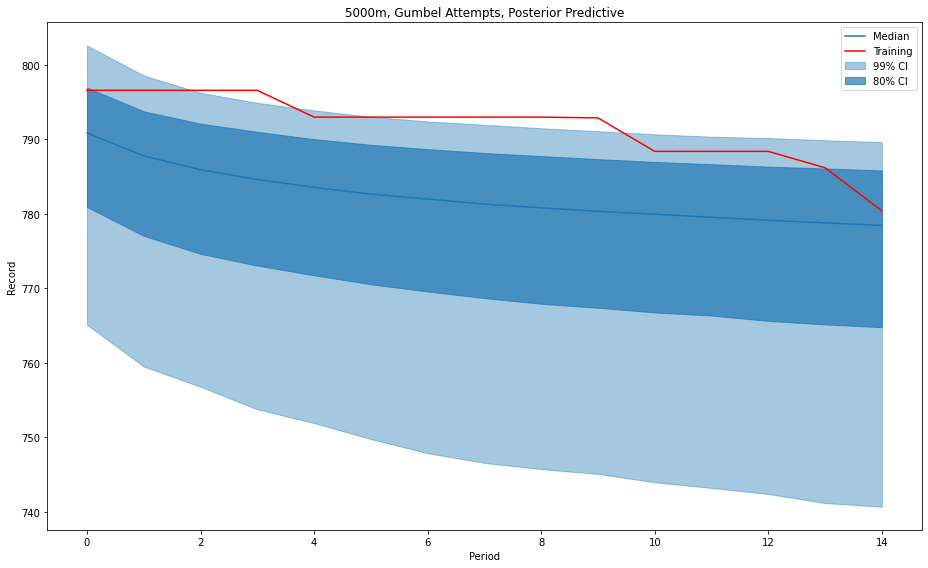

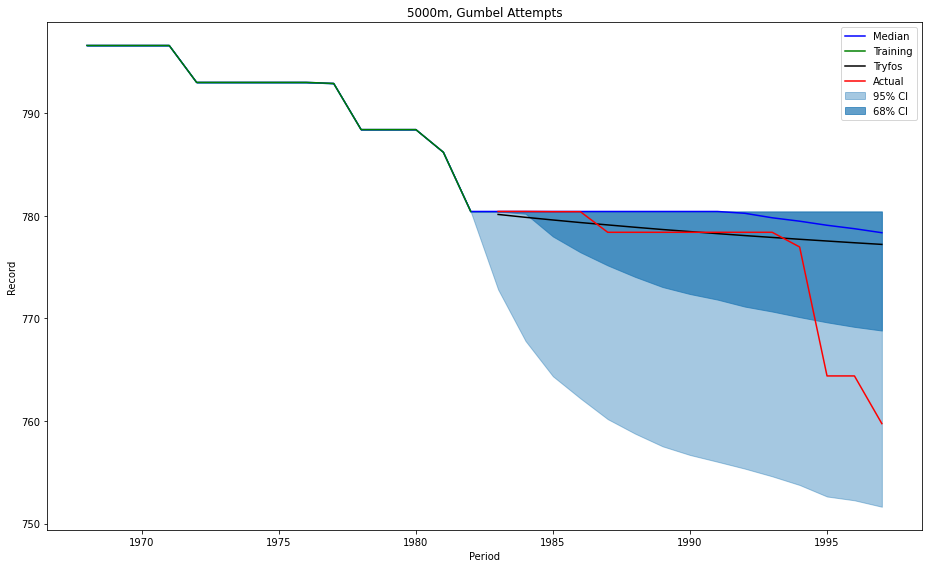

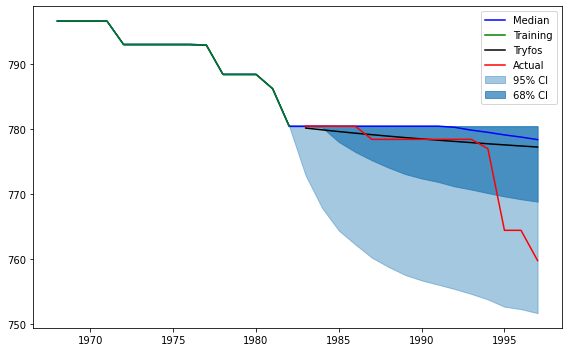

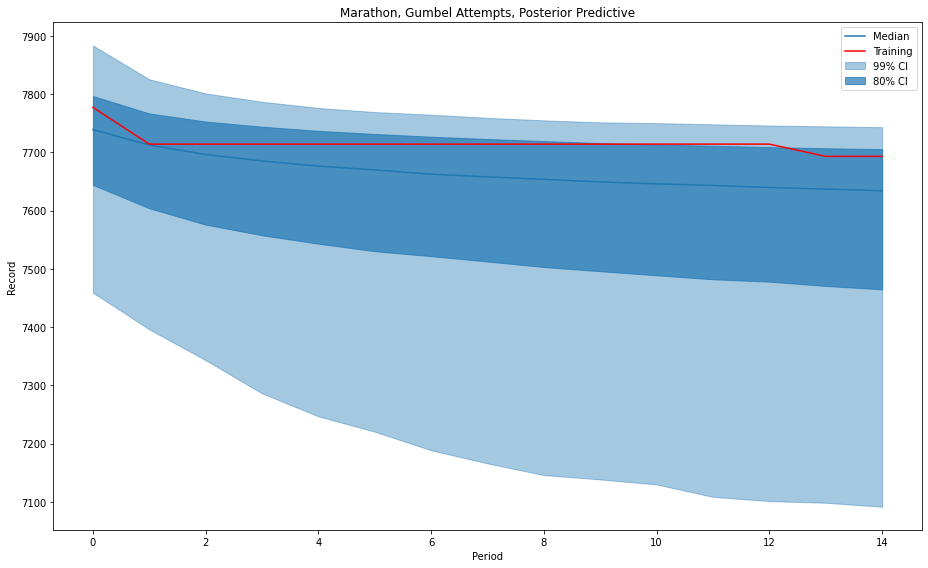

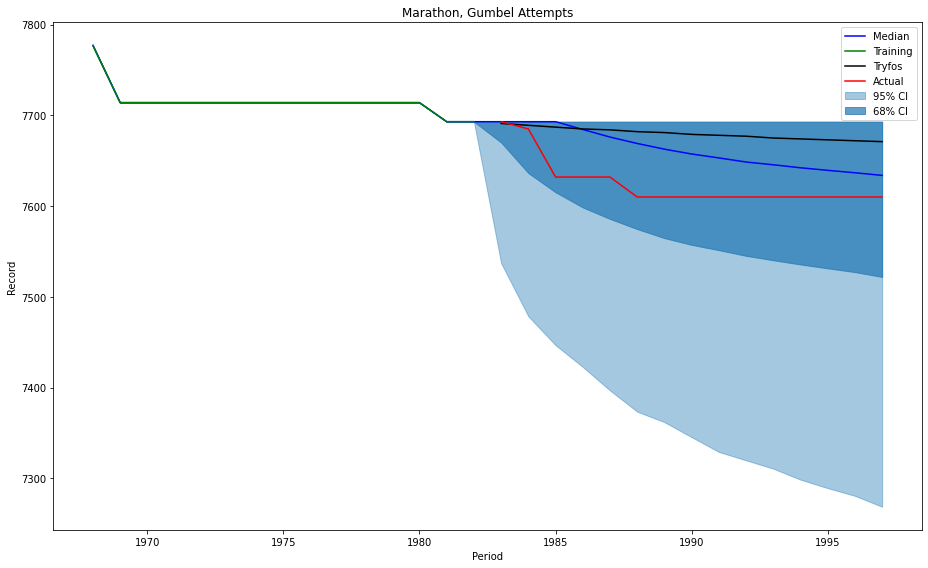

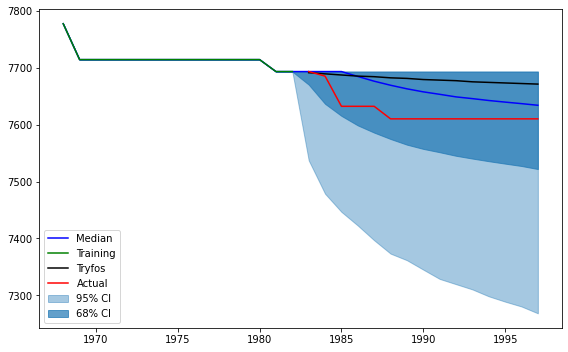

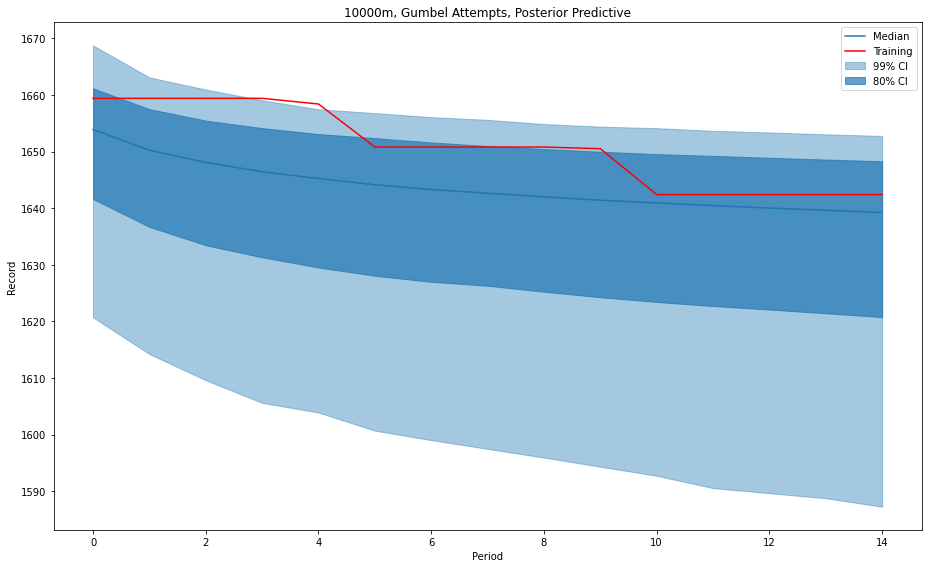

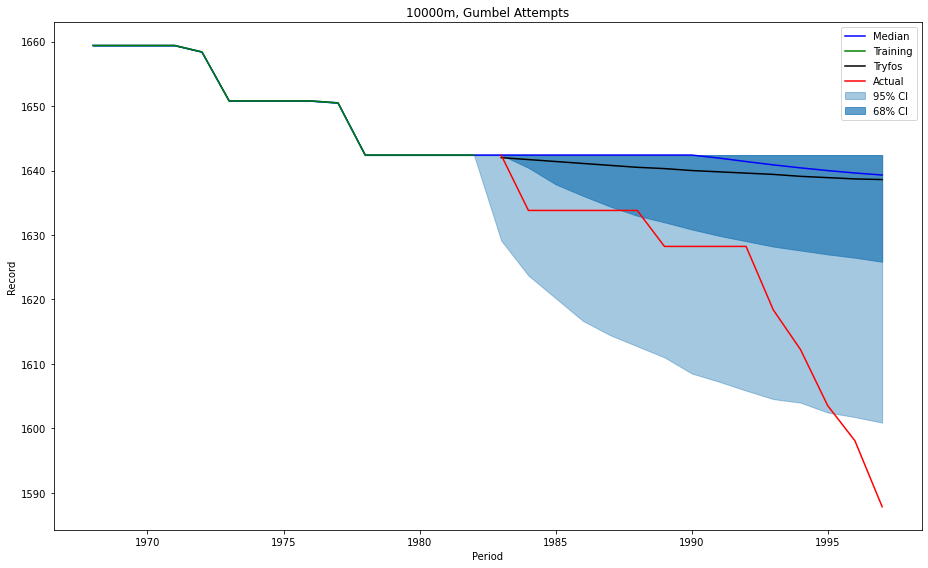

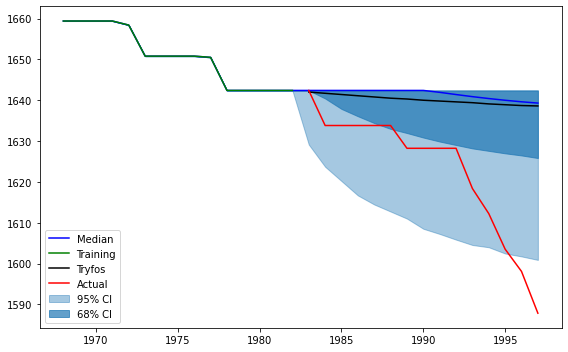

In [25]:
#whiches = ["1m", "5000m", "10000m", "Marathon"]
whiches = ["1000m", "1m", "5000m", "Marathon", "10000m"]
#whiches = []

mses = {}
avg_log_probs = {}

fails = []

#whiches = ["1000m"]
for which in whiches:

    try:

        df = pd.read_csv("tryfos_data.csv")
        years, records = df["Year"].values, df[which].values # Years 1983 and onward are just forecasts

        training_years = years[:15]
        training_records = records[:15]
        tryfos_years = years[15:]
        tryfos_fcast = records[15:]

        actual_df = pd.read_csv("tryfos_actual.csv")
        _, actual_records = actual_df["Year"].values, actual_df[which].values

        prior_parameters = {
        'alpha' : {
            'lower' : 1e-5,
            'upper' : 10e4,
        },
        'beta' : {
            'lower' : 1e-5,
            'upper': 10e4,
            }
        }


        model = fm.WeibullForecastModel(training_records, prior_parameters=prior_parameters, attempt_distribution="weibull", 
                            kind="min", train='all', fcast_len=len(tryfos_fcast), fcast_test_data=actual_records)
        model.fit(chains=1, draws=10000, tune=3000)
        model.posterior_predictive()
        model.forecast()

        # MSE calculation
        median = np.quantile(model.forecast_samples[:,-15:], q=0.5, axis=0)
        bayes_mse = fm.mse(median, model.fcast_test_data)
        tryfos_mse = fm.mse(tryfos_fcast, model.fcast_test_data)
        mses[which] = (bayes_mse, tryfos_mse)

        # Average logp
        avg_log_probs[which] = np.mean(model.posterior_predictive_ppc["log_like_holdout"])

        # Plots
        fig = plot_posterior_predictive(model, f"{which}, Gumbel Attempts, Posterior Predictive")
        fig.savefig(f"final_{which}_weibull_attempts_post_pred.png")

        # fig = plot_forecast(model, tryfos_fcast, f"{which}, Gumbel Attempts, Forecast", actual_records)
        # fig.savefig(f"{which}_gumbel_attempts_forecast.png")

        fig = plot_forecast_fin(model, tryfos_fcast, f"{which}, Gumbel Attempts", actual_records)
        fig.savefig(f"final_{which}_weibull_attempts_forecast.png")

        fig = plot_forecast_small(model, tryfos_fcast, f"{which}, Gumbel Attempts", actual_records)
        fig.savefig(f"s_final_{which}_weibull_attempts_forecast.png")



    except:
       print(f"Error: failed on {which}")
       fails.append(which)

In [ ]:
median = np.quantile(model.forecast_samples[:,-15:], q=0.5, axis=0)
        bayes_mse = fm.mse(median, model.fcast_test_data)
        tryfos_mse = fm.mse(tryfos_fcast, model.fcast_test_data)
        mses[which] = (bayes_mse, tryfos_mse)

        # Average logp
        avg_log_probs[which] = np.mean(model.posterior_predictive_ppc["log_like_holdout"])


In [27]:
mses

{'1000m': (0.46124112260013295, 0.30973333333333847),
 '1m': (1.2945511014535986, 1.9230733333333596),
 '5000m': (53.34885853787958, 43.3707066666667),
 'Marathon': (1650.8767617418837, 3500.8),
 '10000m': (542.2791916324918, 496.97074666666725)}

In [28]:
avg_log_probs

{'1000m': -2.821666800640059,
 '1m': -10.722408224454117,
 '5000m': -35.97029502715587,
 'Marathon': -26.582149818508782,
 '10000m': -77.51652391621198}

# Inverse gamma approximation

In [15]:
import numpy as np
import math
import scipy.special

def _lambert_w(z):
    """
    Lambert W function, principal branch.
    See http://en.wikipedia.org/wiki/Lambert_W_function
    Code taken from http://keithbriggs.info/software.html
    """
    eps=4.0e-16
    em1=0.3678794411714423215955237701614608
    assert z>=-em1, 'LambertW.py: bad argument %g, exiting.'%z
    if 0.0==z: 
        return 0.0
    if z<-em1+1e-4:
        q=z+em1
        r=math.sqrt(q)
        q2=q*q
        q3=q2*q
        return\
        -1.0\
        +2.331643981597124203363536062168*r\
        -1.812187885639363490240191647568*q\
        +1.936631114492359755363277457668*r*q\
        -2.353551201881614516821543561516*q2\
        +3.066858901050631912893148922704*r*q2\
        -4.175335600258177138854984177460*q3\
        +5.858023729874774148815053846119*r*q3\
        -8.401032217523977370984161688514*q3*q
    if z<1.0:
        p=math.sqrt(2.0*(2.7182818284590452353602874713526625*z+1.0))
        w=-1.0+p*(1.0+p*(-0.333333333333333333333+p*0.152777777777777777777777))
    else:
        w=math.log(z)
    if z>3.0: 
        w-=math.log(w)
    for i in range(10):
        e=math.exp(w)
        t=w*e-z
        p=w+1.0
        t/=e*p-0.5*(p+1.0)*t/p
        w-=t
        if abs(t)<eps*(1.0+abs(w)): 
            return w
    #raise AssertionError, 'Unhandled value %1.2f'%z

def _gamma_inverse(x):
    """
    Inverse the gamma function.
    http://mathoverflow.net/questions/12828/inverse-gamma-function
    """
    k=1.461632 # the positive zero of the digamma function, scipy.special.psi
    assert x>=k, 'gamma(x) is strictly increasing for x >= k, k=%1.2f, x=%1.2f' % (k, x)
    C=math.sqrt(2*np.pi)/np.e - scipy.special.gamma(k) # approximately 0.036534
    L=np.log((x+C)/np.sqrt(2*np.pi))
    gamma_inv = 0.5+L/_lambert_w(L/np.e)
    return gamma_inv

In [16]:
_gamma_inverse(100)

5.888157950897754

In [70]:
desired_mean = training_records[0]

In [79]:
desired_mean

136.2

In [80]:
beta = 3*desired_mean

In [82]:
alpha = 1/(3.88972  - 1)

In [83]:
beta

408.59999999999997

In [84]:
alpha

0.3460542889968578

In [85]:
mean_sigma_weibull(alpha, beta)

(2138.191270653813, -3.63597462154916e-14)

In [69]:
# Input desired mean here
desired_mean = training_records[0]

# Pick a beta (larger means larger variance, I think)
beta = 2*desired_mean

# This determines a value for alpha
alpha = 1/(_gamma_inverse(desired_mean/beta) - 1)

# Define some bounds around alpha and beta (for lower and upper of uniform priors)
pct_diff = 0.01
alpha_lower = alpha*(1-pct_diff)
alpha_upper = alpha*(1+pct_diff)
beta_lower = beta*(1-pct_diff)
beta_upper = beta*(1+pct_diff)

# What are the means at each of these boundary points?
def mean_sigma_weibull(alpha, beta):
    mean = beta*scipy.special.gamma(1 + 1/alpha)
    return mean, (beta**2)*scipy.special.gamma(1 + (2/alpha) - ((mean**2)/(beta**2)))

mean, sigma = mean_sigma_weibull(alpha, beta)
print(f"alpha, beta -> mean = {mean}, sigma = {sigma}")

AssertionError: gamma(x) is strictly increasing for x >= k, k=1.46, x=0.50

In [66]:
alpha

0.09114177157985516

In [67]:
1 + (1/alpha)

11.971917515601897

In [68]:
mean/mean

1.0

In [21]:
beta*scipy.special.gamma(1 + (1/alpha))

135.223048928323

In [22]:
beta*scipy.special.gamma(1 + (1/(alpha - 0.01*alpha)))

147.69846644304354

In [9]:
prior_parameters = {
        'alpha' : {
            'lower' : alpha - 0.01*alpha,
            'upper' : alpha - 0.01*alpha,
        },
        'beta' : {
            'lower' : beta - 0.01*alpha,
            'upper' : 1,
        }
    }

In [ ]:
model = fm.WeibullForecastModel(training_records, prior_parameters=prior_parameters, attempt_distribution="gumbel", 
                            kind="min", train='all', fcast_len=len(tryfos_fcast), fcast_test_data=actual_records)
model.fit(chains=1, draws=10000, tune=3000)
model.posterior_predictive()
model.forecast()